In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from ase.lattice.cubic import FaceCenteredCubic
from ase.md.langevin import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase.io.trajectory import Trajectory
from ase import units
from ase.calculators.emt import EMT

size = 3
a = 4.24068463425528
T = 1023  # Kelvin
T *= units.kB
atoms = FaceCenteredCubic(directions=[[1, 0, 0], [0, 1, 0], [0, 0, 1]],
                          latticeconstant=a,
                          symbol="Al",
                          size=(size, size, size),
                          pbc=True)

calc = EMT()
atoms.set_calculator(calc)

MaxwellBoltzmannDistribution(atoms, T, force_temp=True)

dyn = Langevin(atoms, 2 * units.fs, T, 0.1)

# Data storage
steps = []
epot_list = []
ekin_list = []
total_energy_list = []
temperature_list = []

step = 0
interval = 1

def printenergy(a=atoms):  
    global step, interval
    epot = a.get_potential_energy() / len(a)
    ekin = a.get_kinetic_energy() / len(a)
    temp = ekin / (1.5 * units.kB)
    
    steps.append(step)
    epot_list.append(epot)
    ekin_list.append(ekin)
    total_energy_list.append(epot + ekin)
    temperature_list.append(temp)
    
    print('Step={:<8d} Epot={:.5f} Ekin={:.5f} T={:.3f} Etot={:.5f}'.format(
        step, epot, ekin, temp, epot + ekin))
    
    step += interval
    
dyn.attach(printenergy, interval=1)

traj = Trajectory('md.traj', 'w', atoms)
dyn.attach(traj.write, interval=5)

dyn.run(1000)


C:\Users\franc\AppData\Local\Temp\ipykernel_19432\3882619841.py:22: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)


Step=0        Epot=0.05617 Ekin=0.13223 T=1023.000 Etot=0.18840
Step=1        Epot=0.05658 Ekin=0.13067 T=1010.912 Etot=0.18725
Step=2        Epot=0.05779 Ekin=0.13026 T=1007.759 Etot=0.18805
Step=3        Epot=0.05983 Ekin=0.13000 T=1005.720 Etot=0.18983
Step=4        Epot=0.06272 Ekin=0.12792 T=989.667 Etot=0.19064
Step=5        Epot=0.06639 Ekin=0.12671 T=980.297 Etot=0.19310
Step=6        Epot=0.07077 Ekin=0.12421 T=960.969 Etot=0.19499
Step=7        Epot=0.07565 Ekin=0.11639 T=900.434 Etot=0.19204
Step=8        Epot=0.08099 Ekin=0.11464 T=886.924 Etot=0.19564
Step=9        Epot=0.08666 Ekin=0.10884 T=842.028 Etot=0.19550
Step=10       Epot=0.09266 Ekin=0.10400 T=804.597 Etot=0.19666
Step=11       Epot=0.09888 Ekin=0.10025 T=775.592 Etot=0.19913
Step=12       Epot=0.10526 Ekin=0.09398 T=727.078 Etot=0.19924
Step=13       Epot=0.11150 Ekin=0.08598 T=665.169 Etot=0.19748
Step=14       Epot=0.11763 Ekin=0.08340 T=645.209 Etot=0.20103
Step=15       Epot=0.12368 Ekin=0.08167 T=631.799 E

True

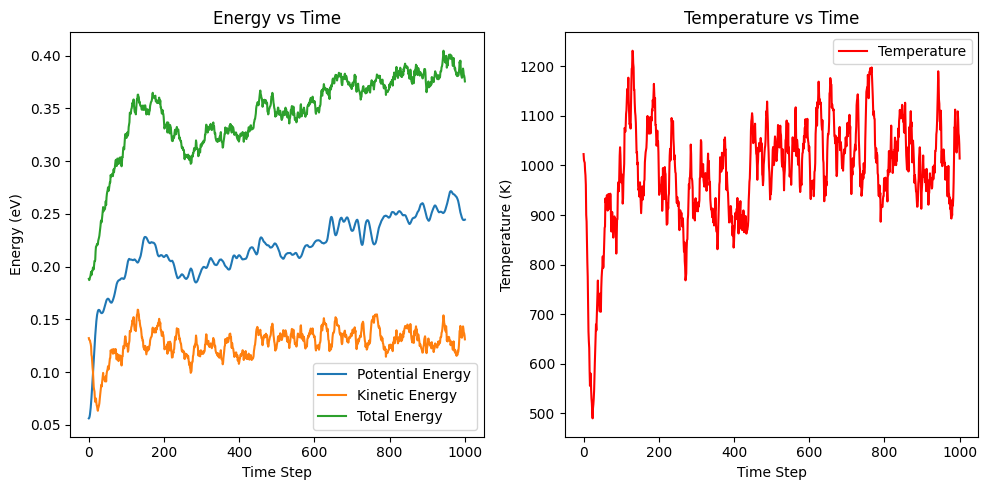

In [4]:

# Plot results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(steps, epot_list, label='Potential Energy')
plt.plot(steps, ekin_list, label='Kinetic Energy')
plt.plot(steps, total_energy_list, label='Total Energy')
plt.xlabel('Time Step')
plt.ylabel('Energy (eV)')
plt.legend()
plt.title('Energy vs Time')

plt.subplot(1, 2, 2)
plt.plot(steps, temperature_list, label='Temperature', color='r')
plt.xlabel('Time Step')
plt.ylabel('Temperature (K)')
plt.legend()
plt.title('Temperature vs Time')

plt.tight_layout()
plt.show()
